In [131]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
master = pd.read_csv('customer_segmentation_data.csv')
display(master.head())

,index,gender,age,annual_income,spending_score,profession,work_experience,family_size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [133]:
display(master.info())
display(master.describe())
display(master.describe(include="object"))
display(master.isnull().sum())
display(master.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            2000 non-null   int64 
 1   gender           2000 non-null   object
 2   age              2000 non-null   int64 
 3   annual_income    2000 non-null   int64 
 4   spending_score   2000 non-null   int64 
 5   profession       1965 non-null   object
 6   work_experience  2000 non-null   int64 
 7   family_size      2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


None

,index,age,annual_income,spending_score,work_experience,family_size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


,gender,profession
count,2000,1965
unique,2,9
top,Female,Artist
freq,1186,612


index               0
gender              0
age                 0
annual_income       0
spending_score      0
profession         35
work_experience     0
family_size         0
dtype: int64

(2000, 8)

# データの探索(eda)

gender
Female    1186
Male       814
Name: index, dtype: int64

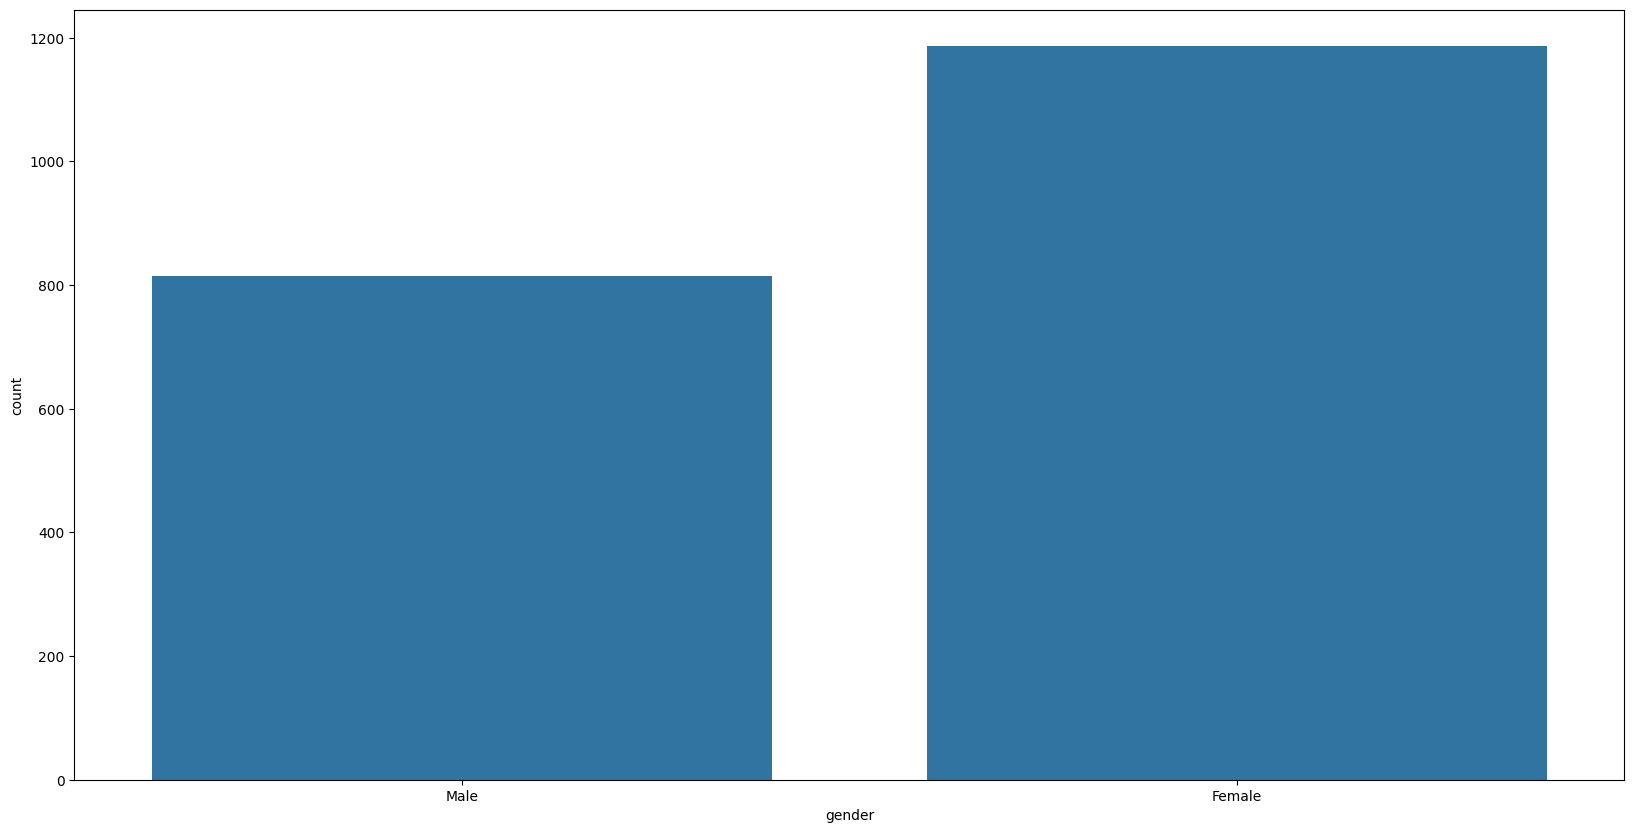

In [134]:
# gendeer
fig = plt.subplots(figsize=(20,10))
sns.countplot(x="gender",data=master)
master.groupby("gender").count()["index"]

age
0     24
1     26
2     15
3     18
4     15
      ..
95    21
96    22
97    22
98     9
99    17
Name: index, Length: 100, dtype: int64

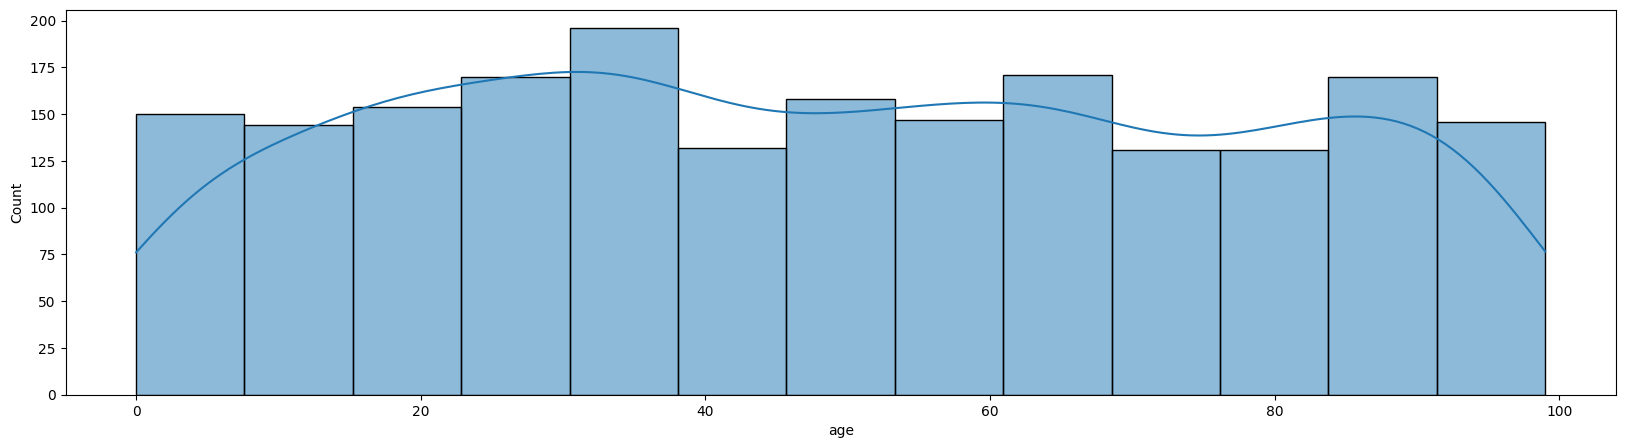

In [135]:
# age
fig = plt.subplots(figsize=(20,5))
sns.histplot(master["age"],kde=True)
master.groupby("age").count()["index"]

In [136]:
#5歳以下のデータ
master.query("age<=5")
# age列は使用しないほうがいい

,index,gender,age,annual_income,spending_score,profession,work_experience,family_size
210,211,Female,1,57000,93,Engineer,1,2
211,212,Female,0,22000,92,Artist,2,1
228,229,Male,0,33000,64,Marketing,1,1
234,235,Female,4,84000,54,Artist,9,1
271,272,Female,1,12000,82,Doctor,0,3
...,...,...,...,...,...,...,...,...
1926,1927,Male,3,74607,69,Healthcare,6,1
1951,1952,Male,1,57522,75,Artist,10,5
1979,1980,Male,0,165321,93,Doctor,8,1
1984,1985,Female,2,153622,51,Lawyer,6,6


count      2000.000000
mean     110731.821500
std       45739.536688
min           0.000000
25%       74572.000000
50%      110045.000000
75%      149092.750000
max      189974.000000
Name: annual_income, dtype: float64

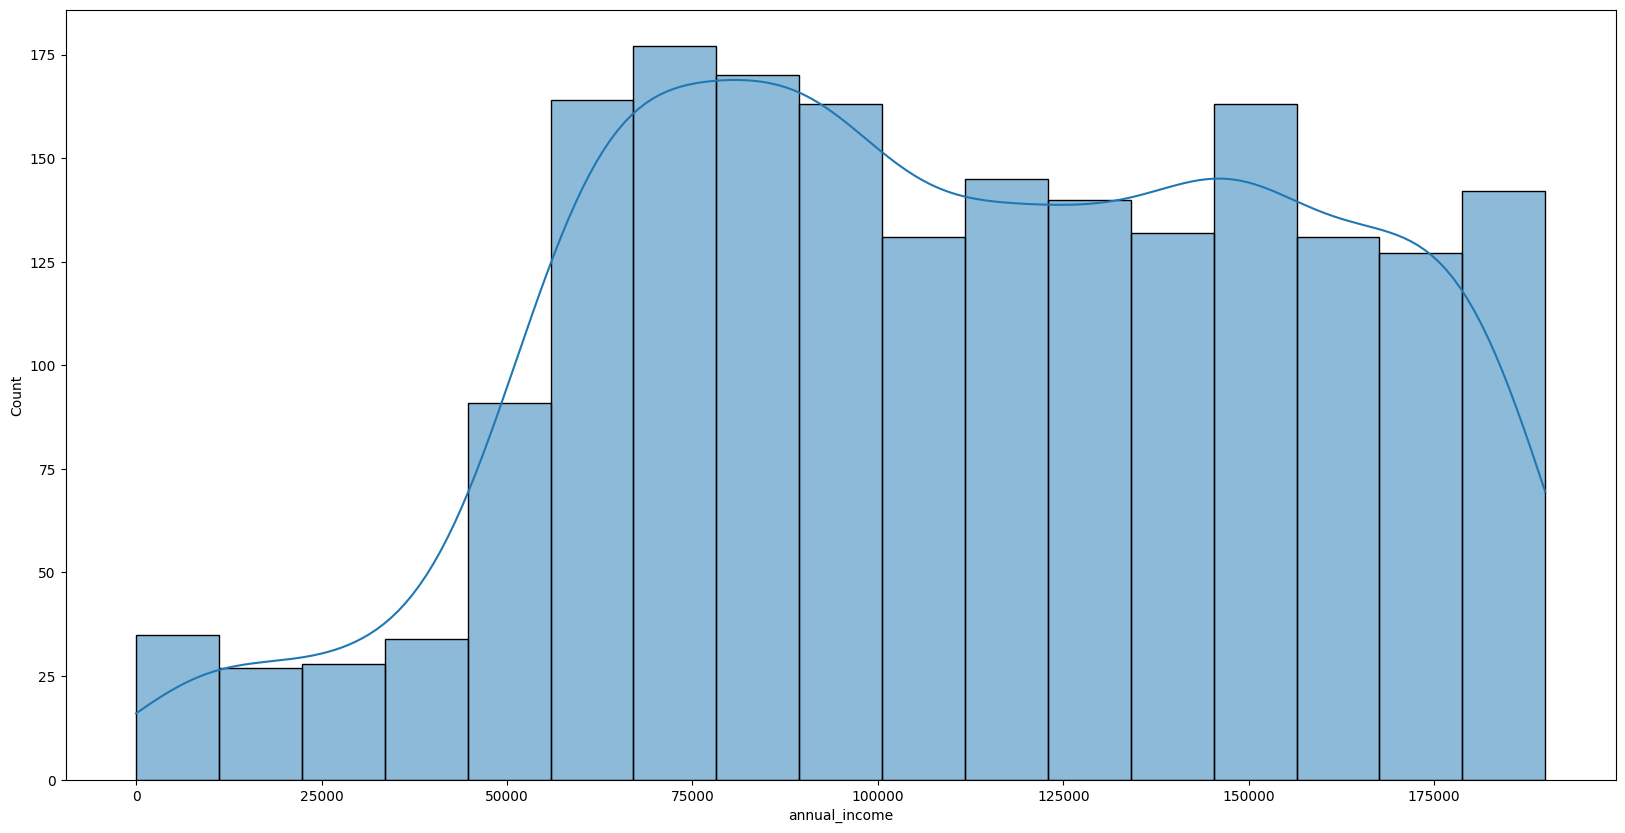

In [137]:
#annual_income
fig = plt.subplots(figsize=(20,10))
sns.histplot(master["annual_income"],kde=True)
master["annual_income"].describe()

profession
Artist           612
Doctor           161
Engineer         179
Entertainment    234
Executive        153
Healthcare       339
Homemaker         60
Lawyer           142
Marketing         85
NULL              35
Name: index, dtype: int64

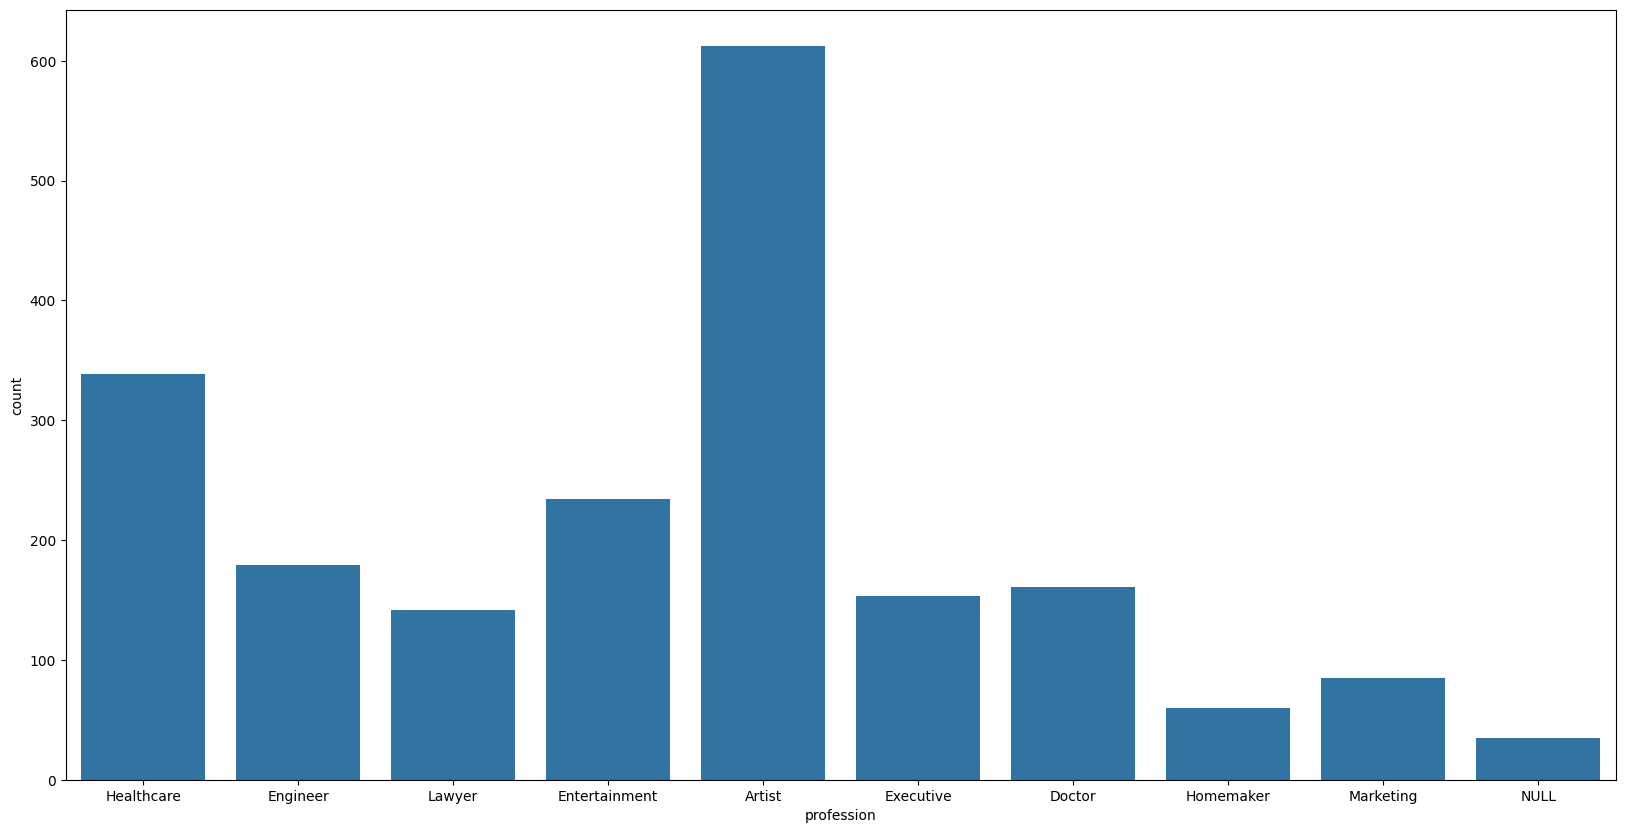

In [138]:
#profession
master["profession"] = master["profession"].fillna("NULL")
fig = plt.subplots(figsize=(20,10))
sns.countplot(x="profession",data=master)
master.groupby("profession").count()["index"]

#one-hot encodingを検討(クラスターの場合多重共線性の問題などは生じないため、すべてのカテゴリーをダミー化して問題ない)


work_experience
0     431
1     470
2      63
3      55
4     121
5     117
6     120
7     126
8     166
9     160
10     84
11     14
12     17
13     16
14     16
15     14
16      5
17      5
Name: index, dtype: int64

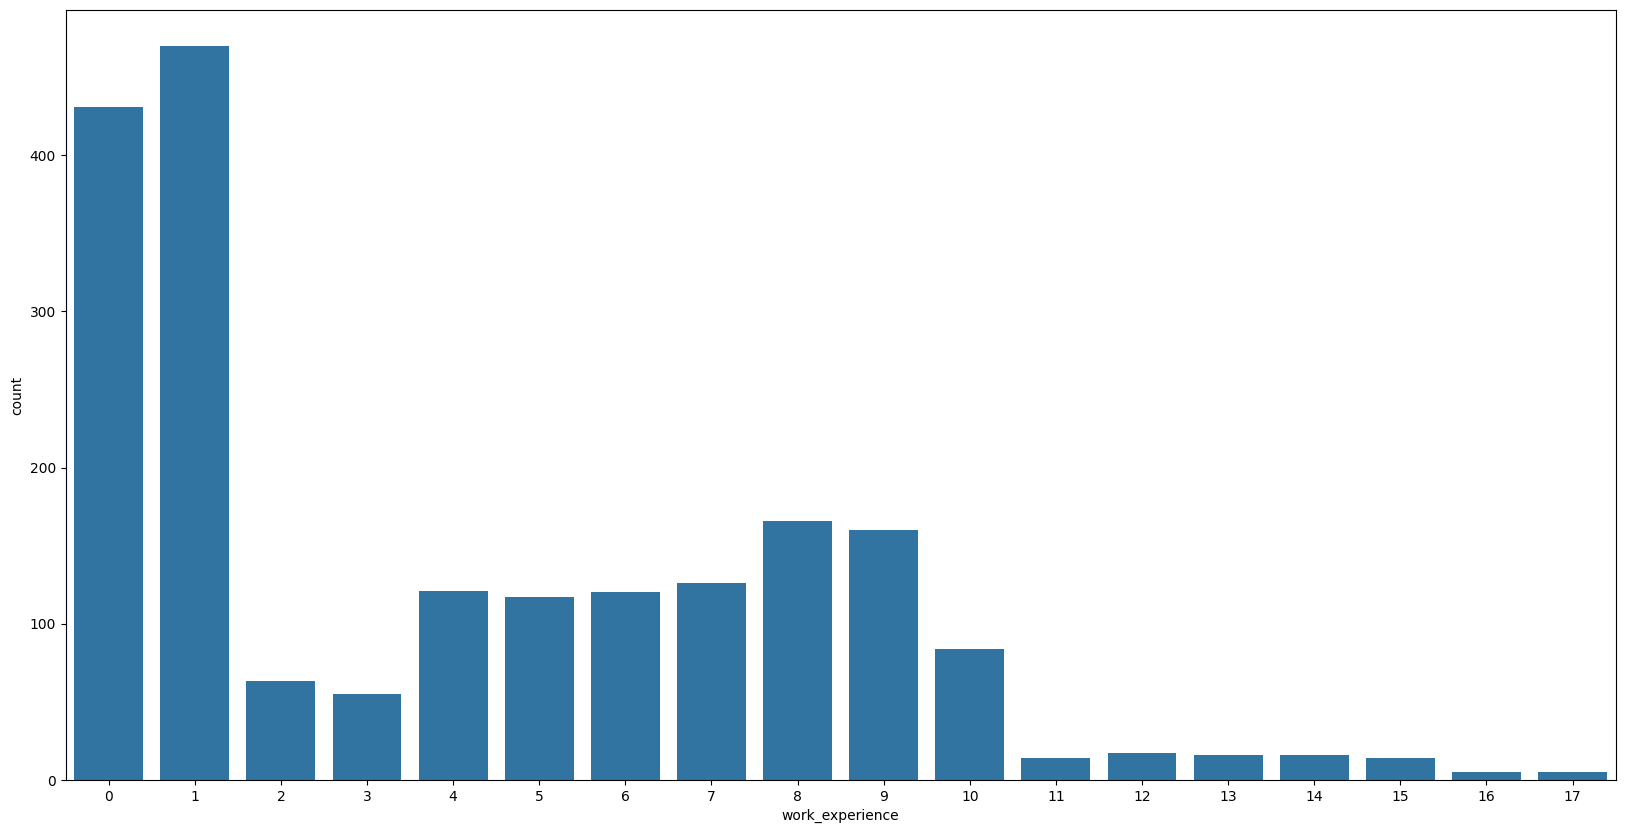

In [139]:
# work_experience
fig = plt.subplots(figsize=(20,10))
sns.countplot(x="work_experience",data=master)
master.groupby("work_experience").count()["index"]
#0~1年目の人が多い。(ここもageの分布と矛盾)


family_size
1    299
2    361
3    311
4    289
5    258
6    243
7    234
8      4
9      1
Name: index, dtype: int64

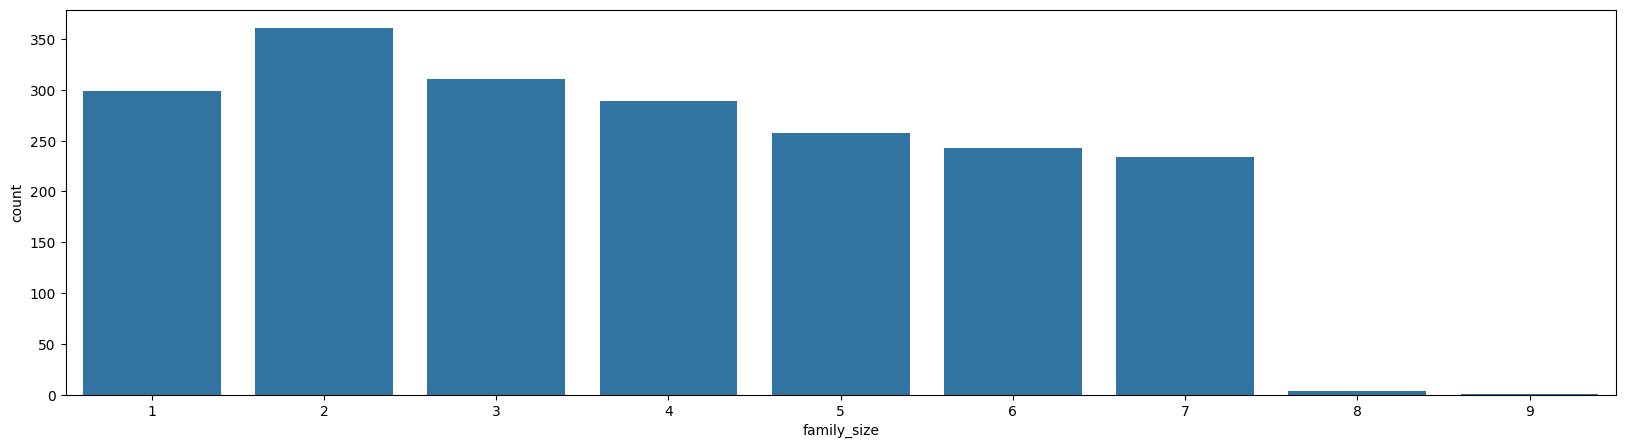

In [140]:
#family_size
#master["family_size"].describe()
fig = plt.subplots(figsize=(20,5))
sns.countplot(x="family_size",data=master)
master.groupby("family_size").count()["index"]


In [141]:
#前処理

In [150]:
# df = master.copy()

# #index削除
# df = df.drop("index",axis=1)

# # #gender M=1,F=0に変換
# df["gender"] = df["gender"].map({"Male": 1,  "Female": 0})

# #age 削除
# df = df.drop("age",axis=1)


# #profession one-hot encodingbの実施
# df_encode = pd.DataFrame({
#     "profession": ["Healthcare",  "Engineer", "Lawyer", "Entertainment", "Artist", "Executive", "Doctor", "Homemaker", "Marketing", "NULL"]
# })

# df_dummy = pd.get_dummies(df_encode).astype(int)


# display(df_dummy.shape)

# df_dummy.info()

# # #他の特徴量は処理の必要なし

# # #結合
# df = pd.concat([df, df_dummy], axis=1)
# df

# df = pd.concat([df, df_dummy], axis=1).astype(int)
# df


# # profession　削除
# df = df.drop("profession",axis=1)

# # 確認
# display(df.head())
# display(df.describe())
# df.info()

In [153]:
df = master.copy()

# #index削除
df = df.drop("index",axis=1)

# # #gender M=1,F=0に変換
df["gender"] = df["gender"].map({"Male": 1,  "Female": 0})

# #age 削除
df = df.drop("age",axis=1)

# #profession one-hot encodingbの実施
df["profession_Healthcare"] = df["profession"].apply(lambda x:1 if x == "Healthcare" else 0)
df["profession_Engineer"] = df["profession"].apply(lambda x:1 if x == "Engineer" else 0)
df["profession_Lawyer"] = df["profession"].apply(lambda x:1 if x == "Lawyer" else 0)
df["profession_Entertainment"] = df["profession"].apply(lambda x:1 if x == "Entertainment" else 0)
df["profession_Artist"] = df["profession"].apply(lambda x:1 if x == "Artist" else 0)
df["profession_Executive"] = df["profession"].apply(lambda x:1 if x == "Executive" else 0)
df["profession_Doctor"] = df["profession"].apply(lambda x:1 if x == "Doctor" else 0)
df["profession_Homemaker"] = df["profession"].apply(lambda x:1 if x == "Homemaker" else 0)
df["profession_Marketing"] = df["profession"].apply(lambda x:1 if x == "Marketing" else 0)
df["profession_NULL"] = df["profession"].apply(lambda x:1 if x == "NULL" else 0)
df = df.drop("profession",axis=1)

# # #他の特徴量は処理の必要なし

# 確認
display(df.head())
display(df.describe())
df.info()

,gender,annual_income,spending_score,work_experience,family_size,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,profession_NULL
0,1,15000,39,1,4,1,0,0,0,0,0,0,0,0,0
1,1,35000,81,3,3,0,1,0,0,0,0,0,0,0,0
2,0,86000,6,1,1,0,1,0,0,0,0,0,0,0,0
3,0,59000,77,0,2,0,0,1,0,0,0,0,0,0,0
4,0,38000,40,2,6,0,0,0,1,0,0,0,0,0,0


,gender,annual_income,spending_score,work_experience,family_size,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,profession_NULL
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,0.407000,110731.821500,50.962500,4.102500,3.768500,0.169500,0.089500,0.071000,0.117000,0.306000,0.076500,0.080500,0.03000,0.042500,0.017500
std,0.491398,45739.536688,27.934661,3.922204,1.970749,0.375287,0.285535,0.256889,0.321501,0.460945,0.265863,0.272134,0.17063,0.201777,0.131158
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,74572.000000,28.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,110045.000000,50.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,149092.750000,75.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,189974.000000,100.000000,17.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   gender                    2000 non-null   int64
 1   annual_income             2000 non-null   int64
 2   spending_score            2000 non-null   int64
 3   work_experience           2000 non-null   int64
 4   family_size               2000 non-null   int64
 5   profession_Healthcare     2000 non-null   int64
 6   profession_Engineer       2000 non-null   int64
 7   profession_Lawyer         2000 non-null   int64
 8   profession_Entertainment  2000 non-null   int64
 9   profession_Artist         2000 non-null   int64
 10  profession_Executive      2000 non-null   int64
 11  profession_Doctor         2000 non-null   int64
 12  profession_Homemaker      2000 non-null   int64
 13  profession_Marketing      2000 non-null   int64
 14  profession_NULL           2000 non-null 

In [154]:
#クラスター分析といいうのは標準化と言うものをもう1段階しなければいけない
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_std = ss.fit_transform(df)
df_std = pd.DataFrame(df_std, columns=df.columns)
display(df_std.head())

,gender,annual_income,spending_score,work_experience,family_size,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,profession_NULL
0,1.207064,-2.093501,-0.428339,-0.791207,0.117497,2.213528,-0.313525,-0.276453,-0.364009,-0.66402,-0.287814,-0.295884,-0.175863,-0.210681,-0.13346
1,1.207064,-1.656133,1.075546,-0.281162,-0.390051,-0.451768,3.189543,-0.276453,-0.364009,-0.66402,-0.287814,-0.295884,-0.175863,-0.210681,-0.13346
2,-0.828457,-0.540845,-1.609962,-0.791207,-1.405148,-0.451768,3.189543,-0.276453,-0.364009,-0.66402,-0.287814,-0.295884,-0.175863,-0.210681,-0.13346
3,-0.828457,-1.131292,0.932319,-1.046230,-0.897599,-0.451768,-0.313525,3.617251,-0.364009,-0.66402,-0.287814,-0.295884,-0.175863,-0.210681,-0.13346
4,-0.828457,-1.590528,-0.392532,-0.536185,1.132594,-0.451768,-0.313525,-0.276453,2.747182,-0.66402,-0.287814,-0.295884,-0.175863,-0.210681,-0.13346


<Axes: xlabel='col1', ylabel='col2'>

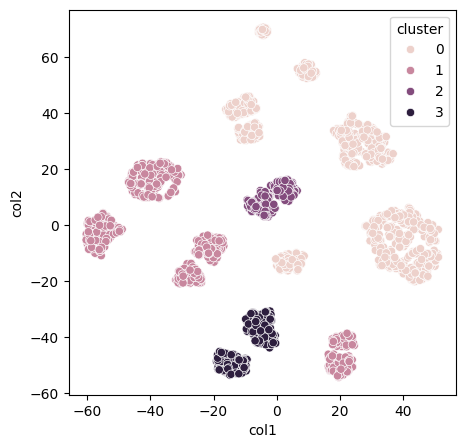

In [161]:
# 特徴量を全て使用してクラスター分析
# クラスター作成、検証、評価
#非階層性クラスター分析(データ数が多いケースでは、処理速度が速い非階層性クタスターが良い)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=1)

clusters = kmeans.fit(df_std)
df["cluster"] = clusters.labels_
#df["cluster"] = clusters.labels_


#特徴量を二次元に次元削減後、クラスターをグラフ化
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=1)
x = tsne.fit_transform(df_std)
tsne_df = pd.DataFrame(x,columns=["col1","col2"])
tsne_df["cluster"] = df["cluster"]
fig  =plt.subplots(figsize=(5,5))
sns.scatterplot(x="col1",y="col2",hue="cluster",data=tsne_df)


In [163]:
# クラスター毎に各特徴量の平均値を算出
display(df.groupby("cluster").count()["gender"])
display(df.groupby("cluster").mean())

cluster
0    945
1    660
2    161
3    234
Name: gender, dtype: int64

,gender,annual_income,spending_score,work_experience,family_size,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,profession_NULL
cluster,,,,,,,,,,,,,,,
0,0.387302,109826.778836,51.167196,4.367196,3.764021,0.000000,0.000000,0.000000,0.0,0.647619,0.161905,0.0,0.063492,0.089947,0.037037
1,0.416667,111851.319697,49.739394,3.887879,3.756061,0.513636,0.271212,0.215152,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,0.447205,111573.217391,51.900621,4.304348,3.670807,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
3,0.431624,110650.333333,52.940171,3.500000,3.888889,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


# 考察

In [164]:
# professionを特徴量から省く

df_df2 = df_std = [["gender","annual_income","spending_score","work_experience","family_size"]]

# 再度クラスタリングを実施
kmeans = TSNE(n_components=2, random_state=1)
___
___

#特徴量を2次元に次元削減後
___
x = tsne.fit_transform(df_df2)
tsne_df = pd.DataFrame(x,columns=["col1","col2"])
tsne_df["cluster"] = df["cluster"]
fig = plt.subplots(figsize=(5,5))
sns.scatterplot(x="col1",y="col2",hue="cluster",data=tsne_df)

AttributeError: 'list' object has no attribute 'shape'